# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula:**

Marcelo Ismael López Verdugo  
A00959089

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [84]:
# Incluye aquí todas las librerías que consideres necesarias:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


La rotación de personal en las organizaciones corresponde a cuando la plantilla se refresca de forma frecuentemente.  Un problema de rotación aparece cuando los empleados no permanecen lo suficiente y se tiene que cubrir los puestos con gente de poco "expertisse".  Entre la consecuencias se encuentra que la capacitación y las habilidades del personal presente podrían ser insuficientes para ejercer los cargos.  

Entre las causas a la alta rotación se encuentra un mal incentivo, poca motivación, el pago, problemas con otros empleados o mal ambiente laboral, mala alineación de las metas personales con las organizacionales entre otras.

++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [2]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


El método "describe" está enfocado en variables numéricas usualmente.  Utilizar el "include=all" como argumento permite forzar el análisis para variables categóricas tambien y puesto que dichas variables no presentan media, moda, mediana o cuartiles, su reporte se enfoca en modas y frecuencias.


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**:  Dicha columna presenta un valor único, de modo que no aporta información para análisis

**b)	EmployeeCount**:  No presenta valor al análisis debido a que son únicamente valores 1

**c)	StandardHours**: Mismo caso al "EmployeeCount".  Son únicamente valores igual a 80, de tal forma que no añaden información para discriminar

**d)	EmployeeNumber**:  Por la naturaleza del dato parece ser un valor de identificación ascendente sin valor añadido para el aprendizaje

++++++++ Termina la sección de agregar texto. +++++++++++




In [3]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [52]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++

x=df.drop(['Attrition'],axis=1)
y=df['Attrition']
#df['Attrition']

x_train,x_1,y_train,y_1=train_test_split(x,y,test_size=0.30,stratify=y,random_state=42)
x_val,x_test,yval,y_test=train_test_split(x_1,y_1,test_size=0.5,stratify=y_1,random_state=6)
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [51]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
le=LabelEncoder()

le.fit(y_train)
ytrainT=le.transform(y_train)

yvalT=le.transform(yval)
ytestT=le.transform(y_test)

ytrainT=pd.DataFrame(ytrainT)
yvalT=pd.DataFrame(yvalT)
ytestT=pd.DataFrame(ytestT)
# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

#(ytrainT['Porcentaje de datos en cada clase de entrenamiento - Attrition:'].value_counts() / ytrainT.shape[0])

print("Training")
print(ytrainT.value_counts() / ytrainT.shape[0])

print("Validation")
print(yvalT.value_counts() / yvalT.shape[0])

print("Testing")
print(ytestT.value_counts() / ytestT.shape[0])



Training
0
0    0.838678
1    0.161322
Name: count, dtype: float64
Validation
0
0    0.840909
1    0.159091
Name: count, dtype: float64
Testing
0
0    0.837104
1    0.162896
Name: count, dtype: float64


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

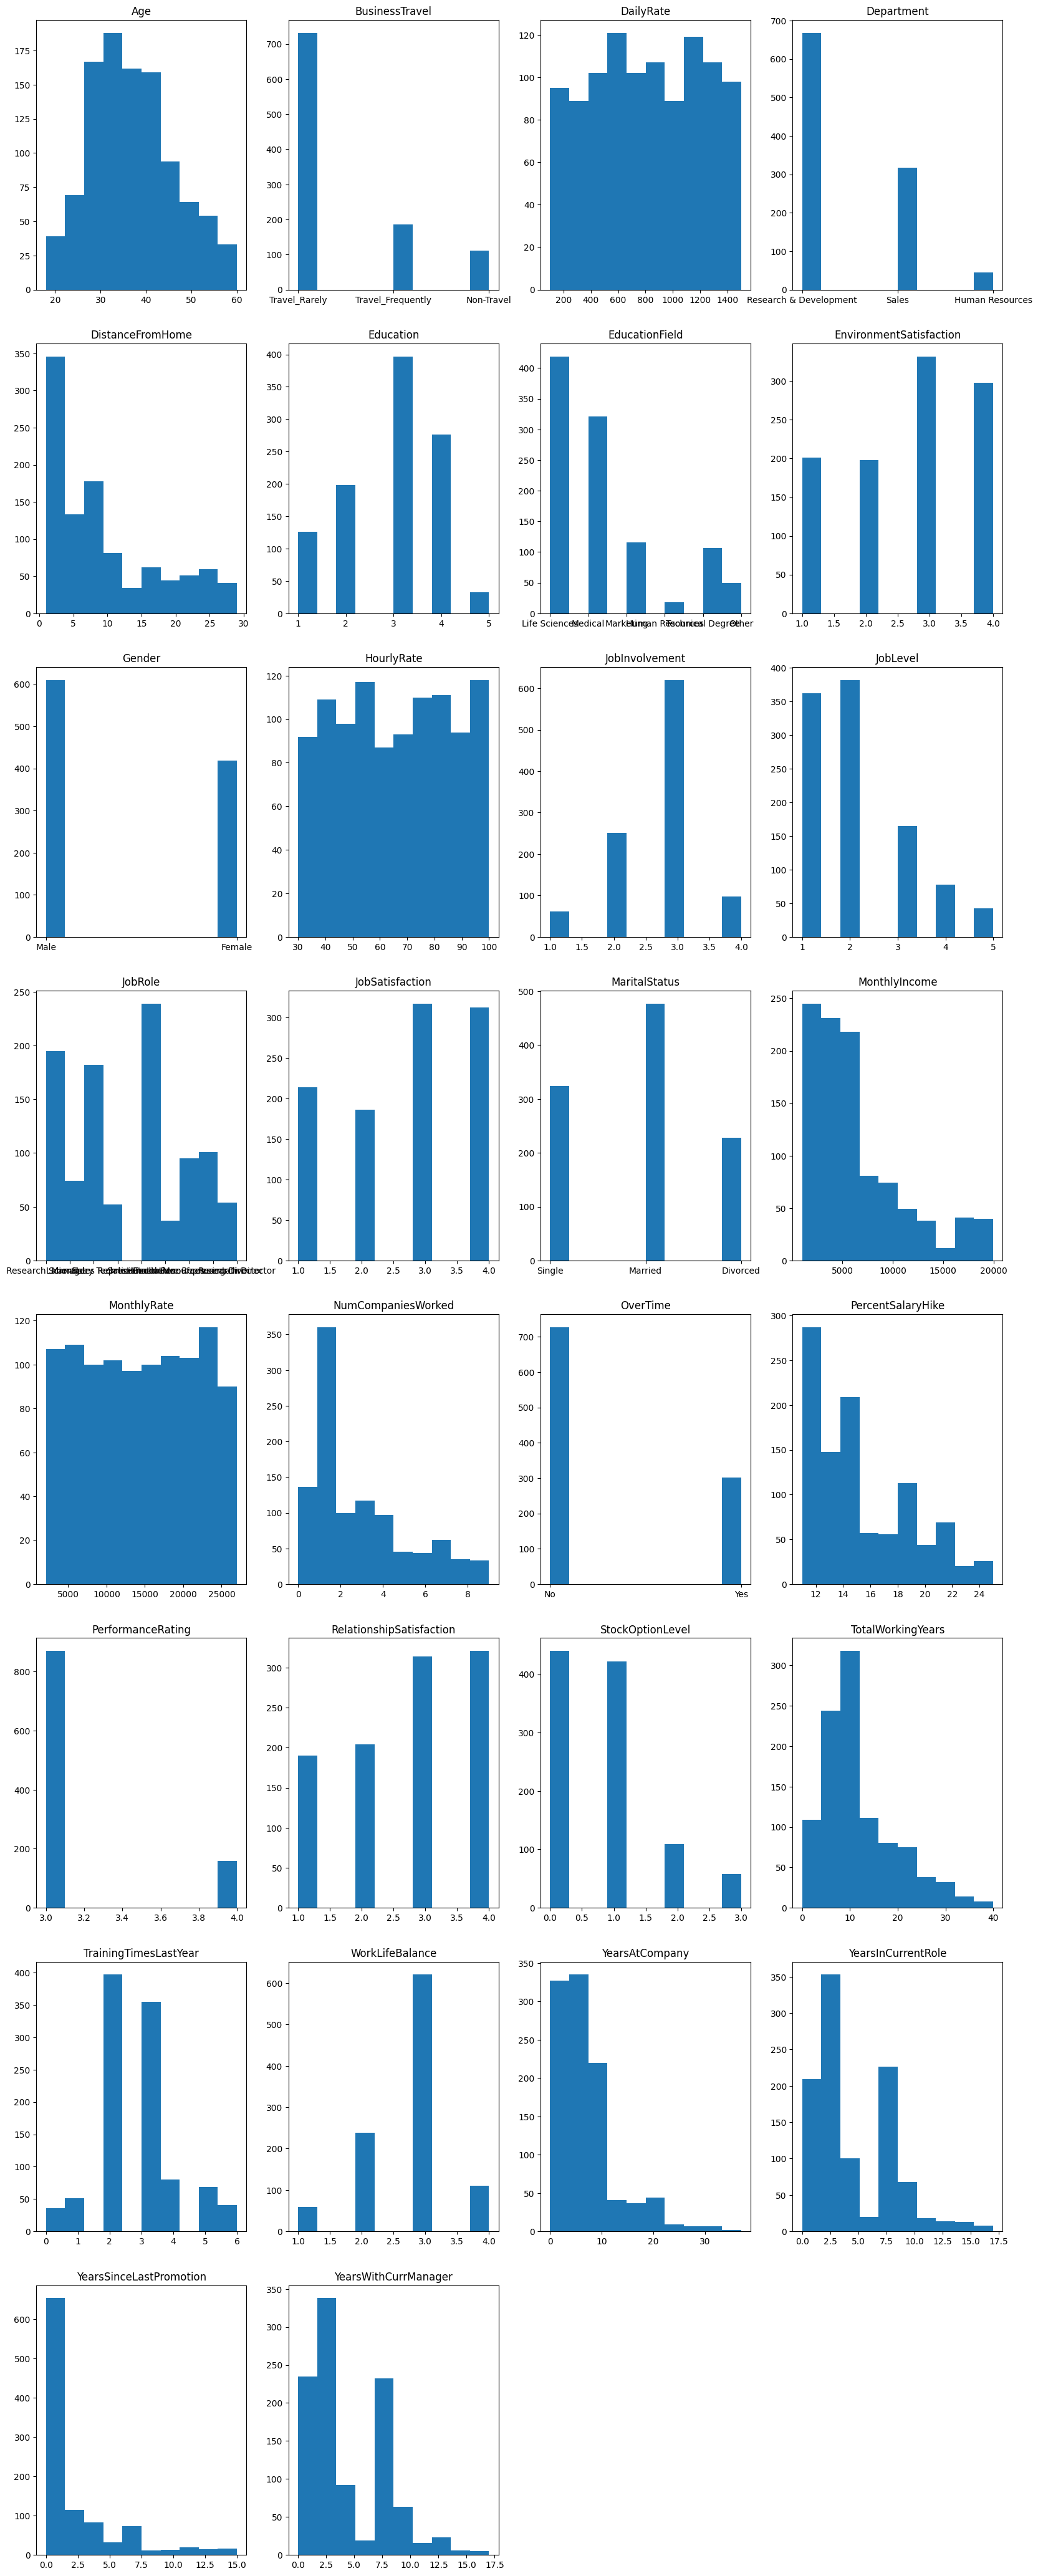

In [6]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.
k=0
plt.figure(figsize=(20,100))
for column in x_train.columns:
    k=k+1
    plt.subplot(15,4,k)
    plt.hist(x_train[column])
    plt.title(column)



# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [85]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),('escalaNum', MinMaxScaler(feature_range=(1,2)))])
numericas_pipeline_nombres = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate',
                              'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TotalWorkingYears',
                              'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                              'TrainingTimesLastYear']


# ORDINALES:
catOrd_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('escalaNum', MinMaxScaler(feature_range=(0,1)))])
catOrd_pipeline_nombres = ['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                           'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

# BINARIAS:
catBin_pipeline = Pipeline(steps=[('impModa',SimpleImputer(strategy='most_frequent')),('ordenc', OrdinalEncoder())])
#catBin_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown='ignore', drop='first'))])
catBin_pipeline_nombres = ['OverTime']

# NOMINALES:
catNom_pipeline = Pipeline(steps = [('modeImp',SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown='ignore', drop='first'))])
catNom_pipeline_nombres = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']



columnasTransformer = ColumnTransformer(transformers=[('numpipe',numericas_pipeline,numericas_pipeline_nombres),
                                                      ('catordpipe',catOrd_pipeline,catOrd_pipeline_nombres),
                                                      ('catbinpipe',catBin_pipeline,catBin_pipeline_nombres),
                                                      ('catnompipe',catNom_pipeline,catNom_pipeline_nombres)],
                                                      remainder='passthrough')

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [76]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++

columnasTransformer.fit(x_train)
a=columnasTransformer.transform(x_train)
b=columnasTransformer.transform(x_val)
#columnas=numericas_pipeline_nombres+catOrd_pipeline_nombres+catBin_pipeline_nombres
#for catnom in catNom_pipeline_nombres:
#    columnas=columnas+list(x_train[catnom].unique())

a=pd.DataFrame(a)
b=pd.DataFrame(b)
Xtv=pd.concat([x_train,x_val])

ytv=pd.concat([ytrainT,yvalT])
#x_TrainTest.columns=columnas
#np.array(x_train.columns)
#for col in x_TrainTest.columns:
#    plt.figure()
#    x_TrainTest[col].hist()

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

(1249, 30)
(1249, 1)


# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

>> LR 0.878 (0.017)
>> LASSO 0.882 (0.013)
>> RIDGE 0.880 (0.016)
>> EN 0.882 (0.011)
>> kNN 0.846 (0.013)


/tmp/ipykernel_2105/866158829.py:64: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.


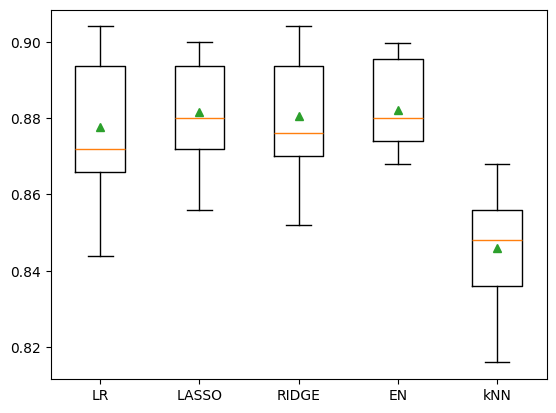

In [87]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=2000,   # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    solver='liblinear', max_iter=2000, C=1.,    # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    solver='liblinear',max_iter=2000, C=10.01,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                     l1_ratio=0.5, solver='saga', max_iter=4000, C=1.,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier()) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.


None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

None

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

None

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<